# TEST TECHNIQUE DATA

Auteur = Lauren GUIOT

Date = 14/09/2023

Vous utiliserez Python, SQL ou SAS pour réaliser vos traitements, à soumettre via Gitlab ou Github.


Vous utiliserez le jeu de données Open data de la SNCF accessible à l'adresse suivante :
https://data.iledefrance-mobilites.fr/explore/dataset/histo-validations-reseau-ferre/information/
pour réaliser les tâches suivantes :
En utilisant seulement que les données du 2 et 3ème trimestre 2022 :
- Quelles sont les 20 premières stations en terme de validations ?
- Proposez une illustration graphique de ce classement.
- Quelles sont les classements des arrêts contenant l’expression « PONT » ?
- Quelles sont les 10 et 25ème stations en terme de validations les jeudi pour la catégorie de titre « NAVIGO » ?

# SOMMAIRE  <a class="anchor" id="sommaire"></a>
* [I. Importation](#I)

* [II. Exploration du jeu de données](#II)

* [III. Préparation](#III)

* [IV. Analyses](#IV)
    * [Quelles sont les 20 premières stations en terme de validations ?](#IV.a)
    * [Proposez une illustration graphique de ce classement.](#IV.b)
    * [Quelles sont les classements des arrêts contenant l’expression « PONT » ?](#IV.c)
    * [Quelles sont les 10 et 25ème stations en terme de validations les jeudi pour la catégorie de titre « NAVIGO » ?](#IV.d)

# I.Importation  <a class="anchor" id="I"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option ('max_colwidth', None)

In [2]:
FerS1= pd.read_csv("2022_S1_NB_FER.txt", sep="\t")
FerS2= pd.read_csv("2022_S2_NB_FER.txt", sep=";")
profilS1= pd.read_csv("2022_S1_PROFIL_FER.txt", sep="\t", dtype=object)
profilS2= pd.read_csv("2022_S2_PROFIL_FER.txt", sep=";", dtype=object)

In [3]:
profilS1.head(2)

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CAT_JOUR,TRNC_HORR_60,pourc_validations
0,100,110,1,PORTE MAILLOT,71379,DIJFP,0H-1H,"1,80"
1,100,110,1,PORTE MAILLOT,71379,DIJFP,10H-11H,"4,62"


In [4]:
FerS1.head(2)

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,01/01/2022,100,110,1,PORTE MAILLOT,71379,?,21
1,01/01/2022,100,110,1,PORTE MAILLOT,71379,AMETHYSTE,62


* [sommaire](#sommaire)

## Exploration du jeu de données <a class="anchor" id="II"></a>


## Dictinnaire de données= 
Information de validations des usagers utilisant un pass sur le réseau Francilien
* Réseau ferré validations sur une station. 725 stations.
* bus/tram rattachée à une ligne précise avec un ensemble d'arrêt prédéfinis. 

Identifiant de la ligne:
code Transporteur de la ligne ; Code du réseau adminsitratif ; Code de la ligne 

Identifiant de l'arrêt:
code Transporteur ; Code du réseau ; Code de l'arrêt 

On se concentre sur le réseau ferré. 
2 fichiers:
* **NB_FER** = Validation sur le réseau ferré => Nombre de validations par jour et par titre de transport pour chaque arrêt
  * Jour d'exploitation 4h-3h59
  * Code transporteur 
  * code réseau
  * code arrêt/station
  * Nom de l'arrêt/station
  * ID de l'arrêt dans le référentiel. 
  * Titre de transport
      * imagine R
      * navigo
      * amethyste
      * tst
      * fgt
      * autre titre
      * non défini
  * Nombre de validations (/! 5 signifie entre 1 et 5 validations )
           
       
* **PROFIL_FER** = Validation sur le réseau ferré => Profils horaires par jour type. 
  * Code transporteur 
  * code réseau
  * code arrêt/station
  * Nom de l'arrêt/station
  * ID de l'arrêt dans le référentiel. 
  * catégorie du jour
      * JOHV Jour ouvré hors Vacances Scolaires
      * SAHV Samedi Hors Vacances Scolaires
      * JOVS Jour Ouvré en période de vacances Scolaires
      * SAVS: Samedi en période de Vacances Scolaires
      * DIJFP: Dimanche et jour Férié et les ponts.
  * Tranche horaire (1h)
  * % de validation de l'heure comparré à la journée entière dans 1 station
  
  
Pas nécessaire à notre étude

In [5]:
# Customiser la présentation des polices
class P:
    H = '\033[95m'  #Header
    BL = '\033[94m'  # Bleu
    G = '\033[92m' # Vert
    R = '\033[93m' #Rouge
    E = '\033[0m' # End
    B = '\033[1m' #Bold
    U = '\033[4m' # Underline
    
def valunique(table) :
    for i in table : 
        unique= table[i].unique()
        if len(unique) < 50 :
            print(P.U + i +P.E,len(unique),"valeurs différentes""\n", unique, "\n" )
        else :
            print(P.U + i +P.E,len(unique),"valeurs différentes" "\n" )
            
def exploration(table):
    table.describe(include='all')
    vnames = [name for name in globals() if globals()[name] is table]
    print(P.H +P.U + (f'ANALYSE STRUCTURE de la table {vnames}')+ P.E)
    print(P.B + P.G+f" Taille:{table.shape}"+P.E)
    print('\n', P.B+ P.G+ 'Types de variable: '+ P.E)
    print(table.info())
    print(P.B+ P.G+ '\nDonnées Uniques: ' +P.E)
    print(valunique(table))
    print(P.B+ P.G+ '\nAnalyse Doublons: ' +P.E)
    print(table.duplicated().sum())
    print(P.B + P.G+ '\nDonnées Manquantes: ' +P.E)
    print(table.isna().mean())

def explo(table):
    return table.describe(include='all')


### Nombre de Validations.

In [6]:
explo(FerS1)

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
count,1088334,1.088334e+06,1088334,1088334,1088334,1.088334e+06,1088334,1.088334e+06
unique,181,NaN,13,751,729,NaN,9,NaN
top,31/05/2022,NaN,110,689,GARE DE LYON,NaN,NAVIGO,NaN
freq,6233,NaN,495814,3246,4886,NaN,134269,NaN
mean,NaN,4.818160e+02,NaN,NaN,NaN,8.778050e+04,NaN,7.504209e+02
std,NaN,3.498036e+02,NaN,NaN,NaN,8.288244e+04,NaN,2.287078e+03
min,NaN,1.000000e+02,NaN,NaN,NaN,0.000000e+00,NaN,5.000000e+00
25%,NaN,1.000000e+02,NaN,NaN,NaN,6.681600e+04,NaN,2.400000e+01
50%,NaN,8.000000e+02,NaN,NaN,NaN,7.116700e+04,NaN,1.430000e+02
75%,NaN,8.000000e+02,NaN,NaN,NaN,7.187000e+04,NaN,5.860000e+02


In [7]:
explo(FerS2)

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,lda,CATEGORIE_TITRE,NB_VALD
count,1105947,1.105947e+06,1105947,1105947,1105947,1.105947e+06,1105947,1.105947e+06
unique,184,NaN,13,756,756,NaN,9,NaN
top,06/12/2022,NaN,110,48093,CHATELET,NaN,NAVIGO,NaN
freq,6239,NaN,507437,3961,3312,NaN,137994,NaN
mean,NaN,4.796337e+02,NaN,NaN,NaN,7.901756e+04,NaN,7.341864e+02
std,NaN,3.499702e+02,NaN,NaN,NaN,6.142823e+04,NaN,2.255593e+03
min,NaN,1.000000e+02,NaN,NaN,NaN,5.940300e+04,NaN,5.000000e+00
25%,NaN,1.000000e+02,NaN,NaN,NaN,6.679500e+04,NaN,2.700000e+01
50%,NaN,8.000000e+02,NaN,NaN,NaN,7.116700e+04,NaN,1.430000e+02
75%,NaN,8.000000e+02,NaN,NaN,NaN,7.187000e+04,NaN,5.360000e+02


Le nombre de validations se trouve entre 5 et 87 304 pour le semestre 1.
Le nombre de validations se trouve entre 5 et 92 139 pour le semestre 2. 
colonne entre semestre 1 et 2 différente pour l'ID de l'arrêt 

In [8]:
exploration(FerS1)

ANALYSE STRUCTURE de la table ['FerS1']
 Taille:(1088334, 8)

 Types de variable: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088334 entries, 0 to 1088333
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   JOUR             1088334 non-null  object
 1   CODE_STIF_TRNS   1088334 non-null  int64 
 2   CODE_STIF_RES    1088334 non-null  object
 3   CODE_STIF_ARRET  1088334 non-null  object
 4   LIBELLE_ARRET    1088334 non-null  object
 5   ID_REFA_LDA      1088334 non-null  int64 
 6   CATEGORIE_TITRE  1088334 non-null  object
 7   NB_VALD          1088334 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 66.4+ MB
None

Données Uniques: 
JOUR 181 valeurs différentes

CODE_STIF_TRNS 3 valeurs différentes
 [100 800 810] 

CODE_STIF_RES 13 valeurs différentes
 ['110' 'ND ' '800' '803' '804' '805' '850' '851' '852' '853' '854' '801'
 '802'] 

CODE_STIF_ARRET 751 valeurs différentes

LIBELLE_ARRET 

In [9]:
exploration(FerS2)

ANALYSE STRUCTURE de la table ['FerS2']
 Taille:(1105947, 8)

 Types de variable: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105947 entries, 0 to 1105946
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   JOUR             1105947 non-null  object
 1   CODE_STIF_TRNS   1105947 non-null  int64 
 2   CODE_STIF_RES    1105947 non-null  object
 3   CODE_STIF_ARRET  1105947 non-null  object
 4   LIBELLE_ARRET    1105947 non-null  object
 5   lda              1105947 non-null  int64 
 6   CATEGORIE_TITRE  1105947 non-null  object
 7   NB_VALD          1105947 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 67.5+ MB
None

Données Uniques: 
JOUR 184 valeurs différentes

CODE_STIF_TRNS 3 valeurs différentes
 [100 800 810] 

CODE_STIF_RES 13 valeurs différentes
 ['110' 'ND ' '800' '803' '804' '805' '850' '851' '852' '853' '854' '801'
 '802'] 

CODE_STIF_ARRET 756 valeurs différentes

LIBELLE_ARRET 

* date à retyper en "datetime"
* on constate un ND dans code réseau voir si modification nécessaire ? 
* A étudier 751 codes arrêts pour 729 libellé différents et 718 ID arrêt ? dans S1 et 756 code et libellé arrêt et 726 ID arrêt. Alors qu'il n'y a que 725 stations de connues.
* On constate un ? dans la catégorie des titres voir si modification nécessaire ? 

* [sommaire](#sommaire)

## Préparation <a class="anchor" id="III"></a>

#### renommer les colonnes 

In [10]:
FerS2.rename(columns={"lda":"ID_REFA_LDA"}, inplace=True)

#### concatener les données pour récupérer les données T2 et T3

In [11]:
Fer=pd.concat([FerS1,FerS2])
Fer.tail(2)

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
1105945,31/12/2022,810,802,905,VILLEPINTE,73547,NON DEFINI,6
1105946,31/12/2022,810,802,905,VILLEPINTE,73547,TST,202


#### Modifier type donnée pour la colonne Date

In [12]:
Fer["ID_REFA_LDA"]= Fer["ID_REFA_LDA"].astype("object")
Fer["JOUR"]= pd.to_datetime(Fer["JOUR"], format='%d/%m/%Y')
Fer.tail(1)

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
1105946,2022-12-31,810,802,905,VILLEPINTE,73547,TST,202


#### Filtrer les dates pour faire apparaitre seulement le 2e et 3e Trimestre

In [13]:
FerT23=Fer.loc[(Fer["JOUR"]>"2022-03-31")& 
               (Fer["JOUR"]<="2022-09-30")]
FerT23

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
538678,2022-04-01,100,110,1,PORTE MAILLOT,71379,?,100
538679,2022-04-01,100,110,1,PORTE MAILLOT,71379,AMETHYSTE,148
538680,2022-04-01,100,110,1,PORTE MAILLOT,71379,AUTRE TITRE,1628
538681,2022-04-01,100,110,1,PORTE MAILLOT,71379,FGT,245
538682,2022-04-01,100,110,1,PORTE MAILLOT,71379,IMAGINE R,2428
...,...,...,...,...,...,...,...,...
547054,2022-09-30,810,802,905,VILLEPINTE,73547,IMAGINE R,796
547055,2022-09-30,810,802,905,VILLEPINTE,73547,NAVIGO,1652
547056,2022-09-30,810,802,905,VILLEPINTE,73547,NAVIGO JOUR,5
547057,2022-09-30,810,802,905,VILLEPINTE,73547,NON DEFINI,11


#### Gérer les données Abérrantes

<Axes: title={'center': 'répartition des titres'}, ylabel='NB_VALD'>

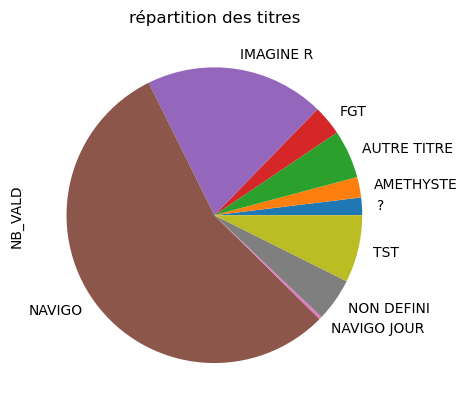

In [14]:
# Vérification de la répartition des titres utilisés pour la validation
FerT23.groupby("CATEGORIE_TITRE")["NB_VALD"].sum().plot.pie(
    title="répartition des titres")


Les Validations sans l'information du titre sont peu nombreuses sous le libellé "?". Je vais les intégrer sous le label "NON DEFINI".

In [15]:
FerT23["CATEGORIE_TITRE"].replace({"?":"NON DEFINI"}, inplace=True)

/var/folders/4r/v5x9v9414yjgsk4ly3r994k80000gn/T/ipykernel_70409/2964186851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FerT23["CATEGORIE_TITRE"].replace({"?":"NON DEFINI"}, inplace=True)


<Axes: title={'center': 'répartition du réseau'}, xlabel='CODE_STIF_RES'>

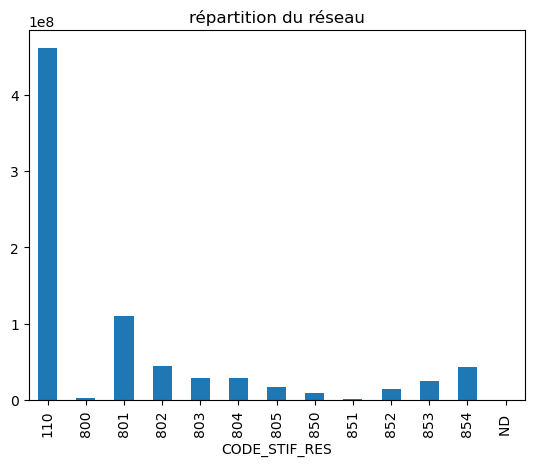

In [16]:
# Vérification de la répartition des réseaux empreintés pour la validation

FerT23.groupby("CODE_STIF_RES")["NB_VALD"].sum().plot.bar(
    title="répartition du réseau")

In [17]:
FerT23[FerT23["CODE_STIF_RES"]=="ND "]

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
541440,2022-04-01,100,ND,ND,Inconnu,0,NON DEFINI,277
541441,2022-04-01,100,ND,ND,Inconnu,0,NAVIGO,23
541442,2022-04-01,100,ND,ND,Inconnu,0,NON DEFINI,44
547556,2022-04-02,100,ND,ND,Inconnu,0,NON DEFINI,44
553273,2022-04-03,100,ND,ND,Inconnu,0,NON DEFINI,193
...,...,...,...,...,...,...,...,...
531428,2022-09-28,100,ND,ND,Inconnu,999999,NON DEFINI,250
537602,2022-09-29,100,ND,ND,Inconnu,999999,NAVIGO,18
537603,2022-09-29,100,ND,ND,Inconnu,999999,NON DEFINI,216
543677,2022-09-30,100,ND,ND,Inconnu,999999,NAVIGO,34


Faible volumétrie de ND et peut de validations associées ni d'arrêts. Je supprime ces lignes.

In [18]:
# stockoge de ces valeurs puis demande à ne pas les conserver dans la table principale
nd= FerT23[FerT23["LIBELLE_ARRET"]=="Inconnu"]["LIBELLE_ARRET"]
FerT23= FerT23[~FerT23["LIBELLE_ARRET"].isin(nd)]

#### Rajout d'informations temporelles

In [19]:
# Rajout du nom du jour pour filtrer par jour
FerT23["NOM_JOUR"] =FerT23.loc[:,'JOUR'].map(lambda d: d.day_name())
FerT23

/var/folders/4r/v5x9v9414yjgsk4ly3r994k80000gn/T/ipykernel_70409/2571492281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FerT23["NOM_JOUR"] =FerT23.loc[:,'JOUR'].map(lambda d: d.day_name())


,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD,NOM_JOUR
538678,2022-04-01,100,110,1,PORTE MAILLOT,71379,NON DEFINI,100,Friday
538679,2022-04-01,100,110,1,PORTE MAILLOT,71379,AMETHYSTE,148,Friday
538680,2022-04-01,100,110,1,PORTE MAILLOT,71379,AUTRE TITRE,1628,Friday
538681,2022-04-01,100,110,1,PORTE MAILLOT,71379,FGT,245,Friday
538682,2022-04-01,100,110,1,PORTE MAILLOT,71379,IMAGINE R,2428,Friday
...,...,...,...,...,...,...,...,...,...
547054,2022-09-30,810,802,905,VILLEPINTE,73547,IMAGINE R,796,Friday
547055,2022-09-30,810,802,905,VILLEPINTE,73547,NAVIGO,1652,Friday
547056,2022-09-30,810,802,905,VILLEPINTE,73547,NAVIGO JOUR,5,Friday
547057,2022-09-30,810,802,905,VILLEPINTE,73547,NON DEFINI,11,Friday


#### Vérification cohérence nombre de stations

In [20]:
# Vérification de la table finale.
valunique(FerT23)

JOUR 183 valeurs différentes

CODE_STIF_TRNS 3 valeurs différentes
 [100 800 810] 

CODE_STIF_RES 12 valeurs différentes
 ['110' '800' '803' '804' '805' '850' '851' '852' '853' '854' '801' '802'] 

CODE_STIF_ARRET 755 valeurs différentes

LIBELLE_ARRET 1317 valeurs différentes

ID_REFA_LDA 750 valeurs différentes

CATEGORIE_TITRE 8 valeurs différentes
 ['NON DEFINI' 'AMETHYSTE' 'AUTRE TITRE' 'FGT' 'IMAGINE R' 'NAVIGO'
 'NAVIGO JOUR' 'TST'] 

NB_VALD 15344 valeurs différentes

NOM_JOUR 7 valeurs différentes
 ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday'] 



Nombreux libellés d'arrêts apparus en plus. 1317 

In [21]:
valunique(FerT23[(FerT23["CODE_STIF_ARRET"]=="2")&
                 (FerT23["CATEGORIE_TITRE"]=="AMETHYSTE")])

JOUR 182 valeurs différentes

CODE_STIF_TRNS 1 valeurs différentes
 [100] 

CODE_STIF_RES 1 valeurs différentes
 ['110'] 

CODE_STIF_ARRET 1 valeurs différentes
 ['2'] 

LIBELLE_ARRET 2 valeurs différentes
 ['ABBESSES' 'ABBESSES      '] 

ID_REFA_LDA 1 valeurs différentes
 [71432] 

CATEGORIE_TITRE 1 valeurs différentes
 ['AMETHYSTE'] 

NB_VALD 66 valeurs différentes

NOM_JOUR 7 valeurs différentes
 ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday'] 



In [22]:
valunique(FerT23[(FerT23["CODE_STIF_ARRET"]=="1")&
                 (FerT23["CATEGORIE_TITRE"]=="AMETHYSTE")])


JOUR 183 valeurs différentes

CODE_STIF_TRNS 1 valeurs différentes
 [100] 

CODE_STIF_RES 1 valeurs différentes
 ['110'] 

CODE_STIF_ARRET 1 valeurs différentes
 ['1'] 

LIBELLE_ARRET 2 valeurs différentes
 ['PORTE MAILLOT' 'PORTE MAILLOT '] 

ID_REFA_LDA 1 valeurs différentes
 [71379] 

CATEGORIE_TITRE 1 valeurs différentes
 ['AMETHYSTE'] 

NB_VALD 107 valeurs différentes

NOM_JOUR 7 valeurs différentes
 ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday'] 



Le libellé du nom d'arrêt est écrit différemment sur le 2e semestre pour certains nom avec des espaces. Trop difficile à normaliser en totalité car suivant le libellé le nombre d'espace est différent. Pas possible de supprimer tous les espaces car il y a aussi des nom composés. 

D'après la documentation "Aujourd’hui, plusieurs codifications coexistent encore pour désigner une ligne ou un arrêt. Seule la codification issue des référentiels est pérenne."

In [23]:
#Arret Semestre 1 non présent dans semestre 2
f=FerS2["ID_REFA_LDA"]
FerS1[~FerS1["ID_REFA_LDA"].isin(f)]["LIBELLE_ARRET"].unique()

array(['FUNICULAIRE   ', 'BUZENVAL', 'CHATEAU-LANDON', 'ETIENNE-MARCEL',
       'HAVRE-CAUMARTIN', 'LA CHAPELLE', 'LA MOTTE-PICQUET-GRENELLE',
       'LA MUETTE', 'LE PELETIER', 'LES HALLES', 'BASTILLE', 'MIRABEAU',
       'PORTE DAUPHINE', 'PORTE DE CLIGNANCOURT', 'BIR-HAKEIM (GRENELLE)',
       'Inconnu', 'ETAMPES', 'JUVISY', 'MAGENTA', 'OZOIR-LA-FERRIERE',
       'SEVRES RIVE GAUCHE', 'TRAPPES', 'TRIEL-SUR-SEINE', 'AUBER',
       'EPLUCHES', 'LES GRESILLONS', 'MAIRIE AUBERV.', 'AIME CESAIRE  '],
      dtype=object)

In [24]:
#Arret Semestre 2 non présent dans semestre 1
f2=FerS1["ID_REFA_LDA"]
FerS2[~FerS2["ID_REFA_LDA"].isin(f2)]["LIBELLE_ARRET"].unique()

array(['FUNICULAIRE   ', 'CHATEAU-LANDON', 'ETIENNE MARCEL',
       'LA CHAPELLE   ', 'LA MUETTE     ', 'AVRON         ',
       'LE PELETIER   ', 'MAIRIE AUBERV.', 'AIME CESAIRE  ',
       'BASTILLE      ', 'MONTPARNASSE  ', 'PORTE DAUPHINE',
       'PORTE D.CLIGN.', 'BIR-HAKEIM    ', 'Inconnu',
       'Camp des loges T13', "L'Etang - Les Sablons T13",
       'Fourqueux - Bel Air T13', 'Mareil-Marly T13', 'ETAMPES', 'JUVISY',
       'GRESILLONS', 'MAGENTA', 'OZOIR LA FERRIE', 'SEVRES RG', 'TRAPPES',
       'EPLUCHES', 'TRIEL SUR SEINE', 'AUBER         ',
       'Les Portes de Saint-Cyr T13', 'Noisy-le-Roi T13',
       'ST GERMAIN GCO', 'Lisière Pereire T13', 'Allée Royale T13',
       'Bailly T13'], dtype=object)

#### disparait dans le Semestre 2 (5)
BUZENVAL, HAVRE-CAUMARTIN, LA MOTTE-PICQUET-GRENELLE, LES HALLES, MIRABEAU

#### Apparait dans à partir du Semestre 2 (12)
AVRON         , MONTPARNASSE  , Camp des loges T13, L'Etang - Les Sablons T13,Fourqueux - Bel Air T13, Mareil-Marly T13, Les Portes de Saint-Cyr T13, Noisy-le-Roi T13, ST GERMAIN GCO, Lisière Pereire T13, Allée Royale T13,Bailly T13

#### doublon  (21)
FUNICULAIRE, CHATEAU-LANDON, ETIENNE MARCEL, LA CHAPELLE , LA MUETTE, LE PELETIER, BASTILLE, PORTE DAUPHINE, PORTE DE CLIGNANCOURT, BIR-HAKEIM (GRENELLE), ETAMPES, JUVISY, MAGENTA,OZOIR-LA-FERRIERE,  SEVRES RIVE GAUCHE, TRAPPES, TRIEL-SUR-SEINE, AUBER, EPLUCHES, LES GRESILLONS, MAIRIE AUBERV., AIME CESAIRE  

In [25]:
valunique(FerT23[FerT23["LIBELLE_ARRET"].str.match('.*BUZENVAL.*')==True])

JOUR 183 valeurs différentes

CODE_STIF_TRNS 1 valeurs différentes
 [100] 

CODE_STIF_RES 1 valeurs différentes
 ['110'] 

CODE_STIF_ARRET 1 valeurs différentes
 ['121'] 

LIBELLE_ARRET 2 valeurs différentes
 ['BUZENVAL' 'BUZENVAL      '] 

ID_REFA_LDA 2 valeurs différentes
 [479928 71697] 

CATEGORIE_TITRE 8 valeurs différentes
 ['NON DEFINI' 'AMETHYSTE' 'AUTRE TITRE' 'FGT' 'IMAGINE R' 'NAVIGO'
 'NAVIGO JOUR' 'TST'] 

NB_VALD 719 valeurs différentes

NOM_JOUR 7 valeurs différentes
 ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday'] 



In [26]:
FerT23[FerT23["ID_REFA_LDA"]==71697]

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD,NOM_JOUR
539757,2022-04-01,100,110,44,AVRON,71697,NON DEFINI,34,Friday
539758,2022-04-01,100,110,44,AVRON,71697,AMETHYSTE,221,Friday
539759,2022-04-01,100,110,44,AVRON,71697,AUTRE TITRE,361,Friday
539760,2022-04-01,100,110,44,AVRON,71697,FGT,188,Friday
539761,2022-04-01,100,110,44,AVRON,71697,IMAGINE R,780,Friday
...,...,...,...,...,...,...,...,...,...
541054,2022-09-30,100,110,121,BUZENVAL,71697,IMAGINE R,1200,Friday
541055,2022-09-30,100,110,121,BUZENVAL,71697,NAVIGO,3025,Friday
541056,2022-09-30,100,110,121,BUZENVAL,71697,NAVIGO JOUR,9,Friday
541057,2022-09-30,100,110,121,BUZENVAL,71697,NON DEFINI,162,Friday


On remarque des incohérences au niveau de l'ID de référence entre le trimestre 2 et 3. 
Cette référence n'est donc pas totalement fiable car elle mélange les stations suivant le trimestre ne rendant pas juste le total de validation.
1 ID peut représenter plusieurs Arrêts.

In [27]:
valunique(FerT23[FerT23["LIBELLE_ARRET"].str.match('.*LAZARE.*')==True])

JOUR 183 valeurs différentes

CODE_STIF_TRNS 2 valeurs différentes
 [100 800] 

CODE_STIF_RES 3 valeurs différentes
 ['110' '805' '854'] 

CODE_STIF_ARRET 3 valeurs différentes
 ['769' '343' '822'] 

LIBELLE_ARRET 3 valeurs différentes
 ['SAINT-LAZARE' 'HAUSSMANN-SAINT-LAZARE' 'SAINT-LAZARE  '] 

ID_REFA_LDA 2 valeurs différentes
 [73688 71370] 

CATEGORIE_TITRE 8 valeurs différentes
 ['NON DEFINI' 'AMETHYSTE' 'AUTRE TITRE' 'FGT' 'IMAGINE R' 'NAVIGO'
 'NAVIGO JOUR' 'TST'] 

NB_VALD 2776 valeurs différentes

NOM_JOUR 7 valeurs différentes
 ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday'] 



Chaque Code représente un transporteur réseau différent mais pour 1 même arrêt. 
Je vais tout de même normaliser le noms des arrêts les plus influents car l'analyse se concentre principalement sur les arrêts avec le plus de validations.

In [28]:
dic_arret= {"LES HALLES    ":"LES HALLES",
            "CHATELET-LES HALLES": "LES HALLES",
            "CHATELET      ":"CHATELET",
           "SAINT-LAZARE  ":"SAINT-LAZARE",
            "HAUSSMANN-SAINT-LAZARE":"SAINT-LAZARE",
            "ESPLANADE DE LA DEFENSE":"DEFENSE", 
            "LA DEFENSE-GRANDE ARCHE":"DEFENSE",
            "LA DEFENSE    ":"DEFENSE",
            "GARE DE LYON  ":"GARE DE LYON",
            "MONTPARNASSE  ":"MONTPARNASSE",
            "GARE DU NORD  ":"GARE DU NORD",
            "GARE DE L'EST ":"GARE DE L'EST",
            "BASTILLE      ":"BASTILLE",
            "BELLEVILLE    ":"BELLEVILLE",
            "SAINT-DENIS": "ST DENIS",
            "REPUBLIQUE    ":"REPUBLIQUE",
            "PONT D.NEUILLY":"PONT DE NEUILLY (AVENUE DE MADRID)",
            "CH.D.G.ETOILE ":"CHARLES DE GAULLE ETOILE",
            "PONT CARDINET ": "PONT CARDINET",
            "PONT-CARDINET":"PONT CARDINET",
            "PONT DE LEVALLOIS-BECON":"PONT LEVALLOIS",
            "PONT-NEUF     ":"PONT-NEUF (LA MONNAIE)",
            "PONT MARIE    ":"PONT-MARIE (CITE DES ARTS)",
            "PONTHIERRY-PRINGY":"PONTHIERRY",
            "PONT PETIT":"PONT-PETIT"
           }
FerT23 = FerT23.replace({"LIBELLE_ARRET":dic_arret})

* [sommaire](#sommaire)

# IV.Analyse  <a class="anchor" id="IV"></a>

## Quelles sont les 20 premières stations en terme de validations ?  <a class="anchor" id="IV.a"></a>

In [29]:
# Regrouper par station et trier par ordre décroissant pour avoir le plus grand nombre de validations
FerT23.groupby(["CODE_STIF_ARRET"]).agg({
                               'LIBELLE_ARRET':lambda x : x.unique(), 
                               'NB_VALD': lambda x : x.sum()}
               ).sort_values(by=["NB_VALD"], ascending=False).head(20)


,LIBELLE_ARRET,NB_VALD
CODE_STIF_ARRET,,
822,[SAINT-LAZARE],15207938
393,[DEFENSE],14794713
163,"[LES HALLES, CHATELET]",14427878
769,[SAINT-LAZARE],13289725
306,[GARE DE LYON],11950268
562,[MONTPARNASSE],9621552
308,[GARE DU NORD],9329620
313,[GARE DE L'EST],7735973
729,[REPUBLIQUE],6147875


De nombreux arrêts ressortent en double car ils sont très utilisés dans les différents reseaux transporteurs.

In [30]:
# J'ai regroupé par nom car il y a des doublons.
FerT23.groupby(["LIBELLE_ARRET"]).agg({
                               'NB_VALD': lambda x : x.sum()}
               ).sort_values(by=["NB_VALD"], ascending=False).head(20)


,NB_VALD
LIBELLE_ARRET,
SAINT-LAZARE,29036473
DEFENSE,22034747
GARE DE LYON,16263340
MONTPARNASSE,13762234
LES HALLES,13133852
GARE DE L'EST,12990894
GARE DU NORD,12833304
CHATELET,11390642
REPUBLIQUE,6147875


## Proposez une illustration graphique de ce classement. <a class="anchor" id="IV.b"></a>

Text(0, 0.5, 'nombre de validations au 1e7 ')

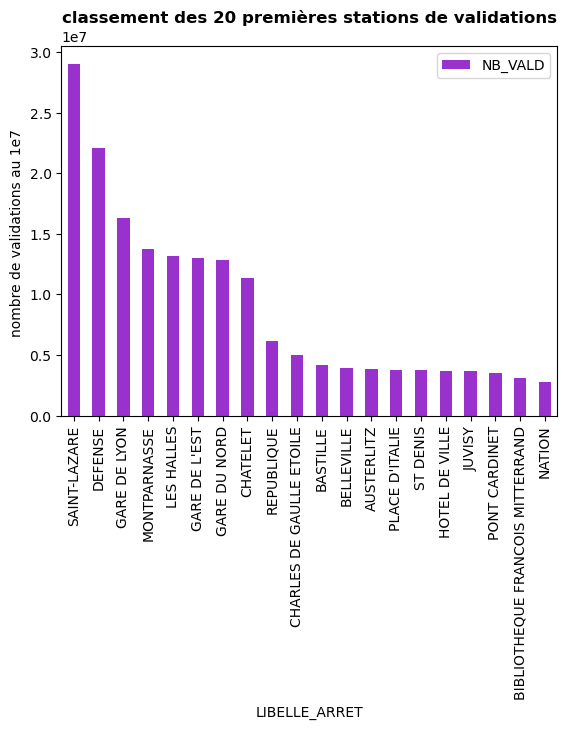

In [31]:
#Création d'un bar plot pour visualiser la répartion des validations sur les 20 premières stations
FerT23.groupby(["LIBELLE_ARRET"]).agg({
                                'NB_VALD': lambda x : x.sum()}
               ).sort_values(by=["NB_VALD"], ascending=False
               ).head(20).plot.bar(color="darkorchid")

plt.title("classement des 20 premières stations de validations", fontweight='bold')
plt.ylabel("nombre de validations au 1e7 ")

## Quelles sont les classements des arrêts contenant l’expression « PONT » ?<a class="anchor" id="IV.c"></a>

In [32]:
# filtrer les libellés pour avoir tous les nom contenant le mot "Pont"
FerT23[FerT23["LIBELLE_ARRET"].str.match('.*PONT.*')==True
      ].groupby(["LIBELLE_ARRET"]).agg({
                                     'NB_VALD': lambda x : x.sum()}
                 ).sort_values(by=["NB_VALD"], ascending=False).head(20)


,NB_VALD
LIBELLE_ARRET,
PONT CARDINET,3547405
PONT DE NEUILLY (AVENUE DE MADRID),2684997
PONT DE SEVRES,1964771
PONT LEVALLOIS,1683008
PONTOISE,924077
JOINVILLE-LE-PONT,907262
PONT-NEUF (LA MONNAIE),673192
BOULOGNE-PONT DE SAINT CLOUD,641283
PONT-MARIE (CITE DES ARTS),599873


## Quelles sont les 10 et 25ème stations en terme de validations les jeudi pour la catégorie de titre « NAVIGO » ? <a class="anchor" id="IV.d"></a>

In [33]:
# filtre sur le jour, la catégorie navigo, Regrouper par station 
FerT23[(FerT23["NOM_JOUR"]=="Thursday") &
       (FerT23["CATEGORIE_TITRE"].str.match('.*NAVIGO.*')==True)
        ].groupby(["LIBELLE_ARRET"]).agg({
                                       'NB_VALD': lambda x : x.sum()}
                  ).sort_values(by=["NB_VALD"], ascending=False
                  ).head(30).iloc[9:26:15] # Faire apparaitre 10e et 25e
                        # commence par 0 [début:fin:pas]


,NB_VALD
LIBELLE_ARRET,
REPUBLIQUE,501297
VAL-DE-FONTENAY,221257


* [sommaire](#sommaire)